## Project Overview
### Train and test a classification model(s) on the Default dataset.
Before training a model on this dataset, a good understanding of each explanatory variable (features) is vital.
### Definition of each feature

 - **limit_bal**: limit balance also known as credit limit is the **credit limit** after applying for a credit card determined by the credit card issuer.
 - **sex:** Sex of the credit card owner which is either 1 for **Male** or 2 for **Female**
 - **education:** Highest level of education for the credit card owner. where 1 = graduate school; 2 = university; 3 = high school; 4 = others
 - **marriage:** Marital status of credit card owner where 1 = married; 2 = single; 3 = others
 - **age:** Ages of card owners.
 - **pay_0 to pay_6:** History of past monthly pay records starting from April(pay_0) to September(pay_6) for each card owner.
    statuses are 0: pay duly, 1: payment delay for one month, 2: payment delay for two months.
 - **bill_amtt1 to bill_amnt6** represents amount of bill statement from April(bill_amt1) to September(bill_amt6). 
    **Bill statement** is a periodic statement that lists all the payments, purchases and other debits and credits during the billing cycle.
 - **pay_amt1 to pay_amt6** is amount paid in the previous month. From April(pay_amt1) to September(pay_amt6)
 - **defaulted:** To defauult means failure to pay a debt on the agreed upon date. IN this case, creditors mostly raise interest rates or decrese the credit limit.
        
Since defaulted is the target variable in this case, suitable models will be used to train and test the other explanatory variables and see which model predicts with highest accuracy on the dataset.


In [19]:
#importing packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
plt.rcParams["figure.figsize"] = (10,7)

In [3]:
data = pd.read_csv('..\..\datasets\defaults.csv')
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# check for null values
data.isnull().any().any()

False

The inbuilt function isnull() prints out any null(undefined or empty space) values and which feature the record belongs. 
In this case there is no null value which therefore helps proceed to the next level.

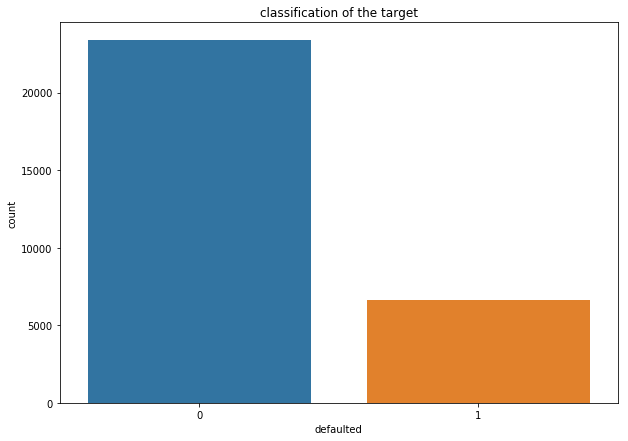

In [20]:
# Frequency count for the 0 and 1 classes of the target.
sns.countplot('defaulted',data=data)
plt.title('classification of the target')
plt.show()

### Training and Testing the data
Machine Learning models to be tested and why!
 - Logistic Regression: This is one of the good fits in this case as the target feature is discrete ie 0s and 1s. 
 - K-Nearest Neighbors: KNN is a non parametric method used for predictions and the output(class) is classified by a plurality vote of its neighbors. 
 - Decision tree: Uses a decision tree as a predictive model which uses a particular item features(or observations) represented as branches to make conclussions(predictions) about the target variable represented in the leaves.

## Logistic Regression with regularization
This is called parameter tuning where the model parameters are changed from the default values so as to better optimize the model.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.iloc[:, 1:24].values
print('X: ', type(X), X.shape)
y = data.iloc[:, 24].values
print('y: ', type(y), y.shape)

# Splitting the data into train and test set in the ratio 80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=10)
print("Accuracy of the logistic regression model on the training and test set is" )

# logistic regression classifier with regularization set to l1.
clf_lr = LogisticRegression(penalty='l1', solver='liblinear')

clf_lr.fit(Xtrain, ytrain)

y_pred_train= clf_lr.predict(Xtrain)
print('[Train] Accuracy score is: ', round(accuracy_score(ytrain, y_pred_train), 4))
      
y_pred_test = clf_lr2.predict(Xtest)
print('[Test] Accuracy score is: ', round(accuracy_score(y_pred_test, ytest), 4))

X:  <class 'numpy.ndarray'> (30000, 23)
y:  <class 'numpy.ndarray'> (30000,)
Accuracy of the logistic regression model on the training and test set is
[Train] Accuracy score is:  0.81
[Test] Accuracy score is:  0.813


### Findings from Logistic Regression model with Regularization
 - Logistic regression model comes with some parameters including penalty. Penalty by default comes with the logistic regression model as l2. Regularixation is a techniwue used to prevent overfitting the model. When L1 is used, the regularization is called Lasso Regression. L1 not only helps reduce model overfitting, it also makes it's data sparce when most of it's cells are zero.
 - Thaccuracy score using regularization is higher and without model overfitting. This could therefore be a good option for predictions to be done with this data as the accuracy scores of the model is >0.8 for both train and test set.

## Confussion Matrix and Classification Report for Logistice with L1 regularization

In [10]:
# Classification report for Logistic regression with L1 regularization

from sklearn.metrics import classification_report

print("[Training Classification Report:]")
print(classification_report(ytrain, y_pred_train))

print("[Test Classification Report:]")
print(classification_report(y_pred_test, ytest))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18681
           1       0.71      0.24      0.36      5319

    accuracy                           0.81     24000
   macro avg       0.76      0.61      0.62     24000
weighted avg       0.79      0.81      0.77     24000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5571
           1       0.24      0.73      0.36       429

    accuracy                           0.81      6000
   macro avg       0.61      0.77      0.62      6000
weighted avg       0.92      0.81      0.85      6000



### Classification Report
A classification report is used to measure the efficiency of a classification model by printing out on a table howmany predictions are true and howmany are false.
 - **Precision** is the ability of this model not to lable a record positive(defaulted card) whereas it is actually negative(non defaulted card).
 - **Recall** This is the ability of this model to find all positive instances. Positive instances is a sum of True Negative(TN) and False Negative(FN)
 - **F1 score** is the weighted harmonic mean of precision and recall where the best score is 1.0 and the worst is 0. This cannot be compared to model accuracy as it adds up the recall and precision during it's computation. 

[[4566  117]
 [1005  312]]


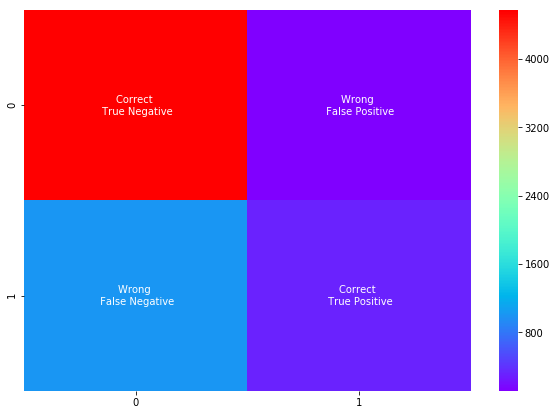

In [21]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(ytest, y_pred_test)
print(cf_matrix)

labels = ['Correct \n True Negative','Wrong \n False Positive','Wrong \n False Negative','Correct \n True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='rainbow')


### Observations from the confussion matrix above
- A confussion matrix is used to measure the performance of a machine learning classifcation model. Also known as the error matrix brings out the visualization of the performance of a classification model.
- From the visualizations above, there are four different sections with different with statistics about the model performance on this data. 
- From a data set of 30000 entries(records), 20% was to test the model which makes a total of 6000 records. The model perfomance on this data therefore gives statistics of the predictions on the table above which is:  
- **4449 TN(True Negatives):** Records that were  predicted as non defaulted and they actually are
- **234 FP(False Positives):** Non defaulted cards but classified as defaulted
- **860 FN(False Negatives):** Defaulted cards instead classififed under non defaulted cards. 
- **457 TP(True Positives):** Records that were predicted as defaulted when actually they cards were defaulted.
- TP and FP are assigned to the **Positive class**(Defaulted cards) while TN and FN are assigned to the **negative class**(Non defaulted cards)

# Learning from Misclassifications
 - A simple and straightforward approach to improving the performance of a classifier that predicts probabilities on an imbalanced classification problem is to tune the threshold used to map probabilities to class labels. This can be done by using ROC Curves and Precision-Recall Curves, the best or optimal threshold for the classifier can therefore be calculated directly.
 - Learning from misclassifications could also aiming to move the decision threshold to the left. This minimizes false negatives, which are especially the cause of poor model performance.
 - The decision for converting a predicted probability or scoring into a class label is governed by a parameter referred to as the **Decision threshold**
 - Normalized predicted probabilities are at a threshold of 0.5, then values less than 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

### Optimal threshold for ROC curve
 - A ROC curve(Receiver Operating Characteristic curve) is a diagnostic plot that evaluates a set of probability predictions made by a model on a test dataset in this case Logistic regression model.
- A set of different thresholds are used to interpret the true positive rate and the false positive rate of the predictions on the positive (minority) class, and the scores are plotted in a line of increasing thresholds to create a curve.
- The ROC Curve is a useful diagnostic tool for understanding the trade-off for different thresholds and the ROC AUC provides a useful number for comparing models based on their general capabilities.

Best Threshold=0.242289, G-Mean=0.678


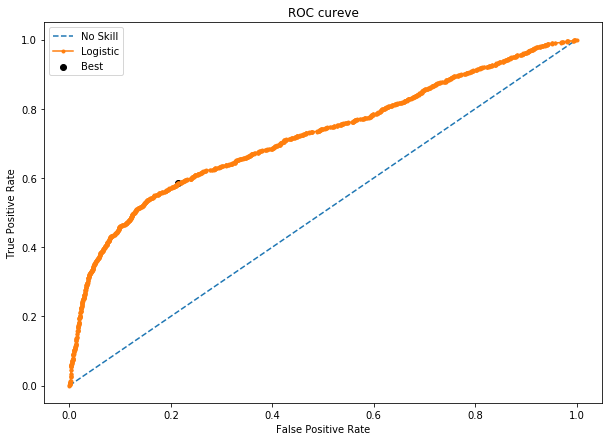

In [33]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

# predict probabilities
yhat = clf_lr.predict_proba(Xtest)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytest, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC cureve')
plt.legend()
# show the plot
plt.show()

### Findings from above
The true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.
 - Sensitivity = TruePositive / (TruePositive + FalseNegative)
 - Specificity = TrueNegative / (FalsePositive + TrueNegative)

Sensitivity = True Positive Rate
Specificity = 1 – False Positive Rate
The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

**G-mean** is a performance metric that combines true positive rate and false positive rate at 'one' specific threshold in this case the threshold is 0.242289 which produces a geo,etric mean of 0.678.

## Optimal Threshold for Precision-Recall Curve
 - Precision is the ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. 
 - Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Best Threshold=0.263865, F-Score=0.516


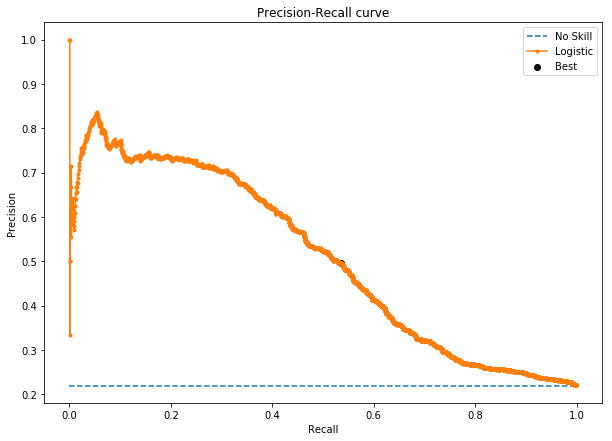

In [32]:
from sklearn.metrics import precision_recall_curve

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(ytest, yhat)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(ytest[ytest==1]) / len(ytest)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
# show the plot
plt.show()

## Optimal Threshold tuning
In this case,  a set of thresholds will be defined and then evaluate predicted probabilities under each in order to find and select the optimal threshold.

In [47]:

from numpy import arange
from numpy import argmax
from sklearn.metrics import f1_score
 
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
 
# predict probabilities
yhat = clf_lr.predict_proba(Xtest)
# probabilities for positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(ytest, to_labels(probs, t)) for t in thresholds]
# get best threshold
ix = argmax(scores)
print('Highest threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Highest threshold=0.264, F-Score=0.51481


C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Chris\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

This causes a slight increase in the highest threshold value from 0.242 to 0.264. This therefore increases the model performance by reducing total number of misclassifications.